# Analysis of Loan Payments Data



## Introduction

The Loan Payments Data represents a list of people who had taken loan from 8th to 14th of september in 2016, and their status and information about the loan that they had taken.

This data set incorporates clients who have paid off their credits, who have been past due and put into collection without paying back their credit and interests, and who have paid off as it were after they were put in collection. In this dataset the money related item may be a bullet advance that clients ought to pay off all of their credit obligation in fair one time by the conclusion of the term, rather than an installment plan. Of course, they might pay off earlier than their pay plan.


## Data Description

The details and data variables are given below:

1. Loan_id : A unique loan (ID) assigned to each loan customers- system generated
2. Loan_status : Tell us if a loan is paid off, in collection process - customer is yet to payoff, or paid off after the collection efforts
3. Principal : Pincipal loan amount at the case origination OR Amount of Loan Applied
4. terms : Schedule
4. Effective_date : When the loan got originated (started)
5. Due_date : Due date by which loan should be paid off
6. Paidoff_time : Actual time when loan was paid off , null means yet to be paid
7. Pastdue_days : How many days a loan has past due date
8. Age : Age of customer
9. Education : Education level of customer applied for loan
10. Gender : Customer Gender (Male/Female)

The dataset was created by a user of a Kaggle platform with a username "Zhijin".

*Source:* https://www.kaggle.com/zhijinzhai/loandata.
    

## Research Questions

1. Analyze the days when loans taken most.
2. What term clients chose mostly to pay off loan.
3. What amount of money is demanded by men and women.
4. The age ratio between the people who had paid off their loan due to deadline. 
5. What is the ratio of loan principals between education levels. 

## Data Preparation

Firstly, we should read the dataset

In [95]:
import time    #importing libraries that we will use
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset and screening it:

In [96]:
ds = pd.read_csv('Loan payments data.csv')
ds.shape

(500, 11)

In [97]:
ds

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


Showing info about dataset: columns, datatypes, quantity of null values

In [98]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB
None


As we see, there only 2 colunms with null values, but we do not need this columns in our analysis, so we let them be not dropped 

In [99]:
ds.isnull().any()

Loan_ID           False
loan_status       False
Principal         False
terms             False
effective_date    False
due_date          False
paid_off_time      True
past_due_days      True
age               False
education         False
Gender            False
dtype: bool

Checking for duplicate values:

In [100]:
ds.duplicated().any()
#so we see that there are no duplicate values in dataset

False

## Data preparation: cleaning and shaping

### Taking the days of effective

In [101]:
dlt = ds.groupby('effective_date') #grouping by effective date of the loan

dlt_count = dlt.count().drop(['loan_status', 'Principal', 'terms', 'due_date', 'paid_off_time', 
                              'past_due_days', 'age', 'education', 'Gender'], axis=1)
#droping not needed columns

dlt_count #counted dataframe values grouped by effective date

,Loan_ID
effective_date,
9/10/2016,46
9/11/2016,231
9/12/2016,148
9/13/2016,23
9/14/2016,33
9/8/2016,4
9/9/2016,15


### Define the terms

Doing the same operations such as grouping, cleaning and counting the values for the 'terms':

In [102]:
tch = ds.groupby('terms')

tch_count = tch.count().drop(['loan_status', 'Principal', 'effective_date', 'due_date', 'paid_off_time', 
                              'past_due_days', 'age', 'education', 'Gender'], axis=1)

tch_count

,Loan_ID
terms,
7,21
15,207
30,272


### Defining the amount of loan taken by men and women

Also grouping the principals:

In [103]:
pr = ds.groupby('Principal')

pr_count = pr.count().drop(['Gender', 'loan_status', 'effective_date', 'terms', 'due_date', 'paid_off_time', 
                              'past_due_days', 'age', 'education'], axis=1)

pr_count

,Loan_ID
Principal,
300,6
500,3
700,1
800,111
900,2
1000,377


The same for gender:

In [104]:
gr = ds.groupby('Gender')

gr_count = gr.count().drop(['loan_status', 'Principal', 'effective_date', 'terms', 'due_date', 'paid_off_time', 
                              'past_due_days', 'age', 'education'], axis=1)

gr_count

,Loan_ID
Gender,
female,77
male,423


### Determine the ages who have paid off their loan

Grouping the age column by its vaules and quantities: 

In [105]:
ar = ds.groupby('age')

ar_count = ar.count().drop(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'paid_off_time', 
                              'past_due_days', 'education', 'Gender'], axis=1)

ar_count
    

,Loan_ID
age,
18,1
19,2
20,4
21,7
22,8
23,10
24,23
25,20
26,46


### Define the ratio of loan principals between education levels

For answering the 5th question we do the previous operations on education levels also:

In [106]:
el = ds.groupby('education')

el_count = el.count().drop(['loan_status', 'Principal', 'effective_date', 'terms', 'due_date', 'paid_off_time', 
                              'past_due_days', 'age', 'Gender'], axis=1)

el_count

,Loan_ID
education,
Bechalor,67
High School or Below,209
Master or Above,4
college,220


Here also we need principal's dataframe:

In [107]:
pr_count

,Loan_ID
Principal,
300,6
500,3
700,1
800,111
900,2
1000,377


## Data visualisation: plotting graphs

### For the first question:

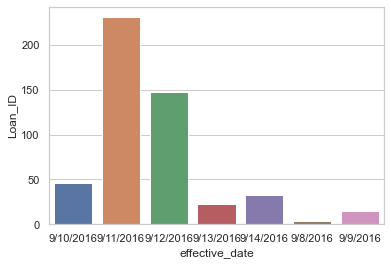

In [131]:
sns.set(style='whitegrid') #setting style for the seaborn plots

dlt_count['effective_date'] = dlt_count.index #defining the index of the plot

q1 = sns.barplot(x = 'effective_date', y = 'Loan_ID', data = dlt_count)

#plotting the barplot of effective date(date where loan were taken)

So, we see that in 11th of September was the peak of taking loans, and in 8th was the least.

### Second quesiton visualisation:

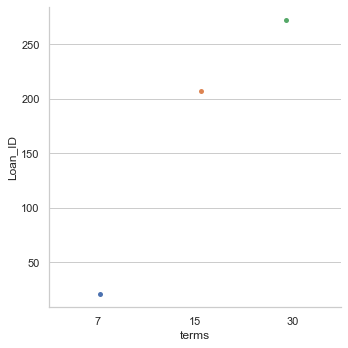

In [126]:
tch_count['terms'] = tch_count.index #setting terms as an index for this dataframe

q2 = sns.catplot(x = 'terms', y = 'Loan_ID', data = tch_count)#plotting...


As it is shown, most of people chose the the longest term, 30-day loan. Moreover, the least term people took was a 7-day loan, which was prefered by clients at last.  